In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [48]:
from sklearn.datasets import make_regression

In [49]:
X,y = make_regression(n_samples = 1000, n_features = 2, n_targets = 1, noise = 3.0)

In [50]:
X

array([[ 1.44712532, -0.3033738 ],
       [-1.08280699, -0.63263901],
       [-0.79993478,  0.75703383],
       ...,
       [-0.30276916,  0.49904953],
       [-0.53066931,  0.04695234],
       [ 0.36807332, -0.86897216]])

In [51]:
y

array([ 2.81020099e+01, -6.29205763e+01,  7.73974920e+00, -2.55693412e+00,
       -3.97536602e+01, -2.19191315e+01,  3.79294466e+01,  1.92090823e+01,
        9.14954545e+01, -2.96558373e+01,  3.73423347e+01, -1.71888778e+01,
       -3.53159674e+01, -4.17227366e+01, -7.78103980e+01,  2.04807711e+01,
       -3.59427513e+01, -6.75497775e+01,  4.66517268e+01,  1.02663741e+02,
        5.59525447e+01,  1.84117832e+01, -8.89421511e+01, -5.39873962e+01,
       -1.82007343e+01,  5.20114262e+01, -3.86868302e+01, -1.14014323e+01,
        2.27015288e+01,  1.18441009e+01,  2.97821473e+01,  4.86864638e+01,
       -3.74688130e+01,  1.37461089e+02, -7.47029726e+00,  7.23764015e+01,
        8.18224991e+01, -2.88118421e+01,  7.71744581e+00,  5.10253138e+01,
        9.07935730e+01, -4.87365301e+01, -6.97002063e+01, -1.03106938e+01,
       -4.72705960e+01, -4.82307532e+01, -1.06786673e+01, -1.79478019e+01,
        5.40393475e+01, -3.21785892e+01, -1.19069914e+01,  3.90515562e+00,
        6.44753042e+01, -

In [52]:
pd.DataFrame(X)[0]

,0
0,1.447125
1,-1.082807
2,-0.799935
3,0.019389
4,-0.908409
...,...
995,1.023609
996,-0.774746
997,-0.302769
998,-0.530669


In [53]:
pd.DataFrame(X)[1]

,1
0,-0.303374
1,-0.632639
2,0.757034
3,-0.002532
4,-0.400511
...,...
995,1.479231
996,1.579754
997,0.499050
998,0.046952


<Axes: xlabel='0', ylabel='1'>

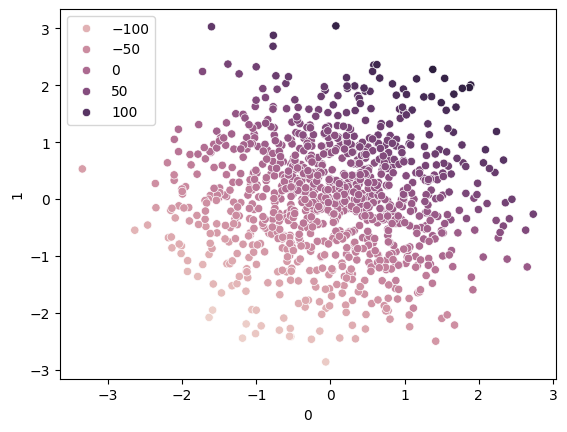

In [54]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue = y)

In [55]:
#train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [56]:
X_train.shape, X_test.shape

((700, 2), (300, 2))

In [57]:
from sklearn.svm import SVR

In [58]:
svr = SVR(kernel = "linear")

In [59]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [60]:
svr.coef_

array([[28.96871099, 44.80227457]])

In [61]:
y_pred = svr.predict(X_test)

In [62]:
y_pred

array([-5.06857227e+01, -6.49259201e+01, -6.22153887e+01,  2.44447342e+01,
       -1.18604055e+01,  1.67911250e+01,  5.11658241e+01,  7.41833756e+01,
        6.73089588e+01, -3.09114958e+01,  8.13476033e+01,  4.13341905e+01,
        6.43831195e+01,  1.92731320e+01,  6.03937045e+01,  7.32207902e+01,
       -4.78637089e+01,  3.06634403e+01,  1.20967818e+01,  3.29318344e+01,
        1.58670512e+01, -3.12938127e+01, -4.53253313e+01,  6.73002190e+01,
       -2.55396228e+01,  3.78412584e+01,  1.16270573e+01, -6.95000289e+01,
       -6.08422590e+01, -1.74727394e+01,  1.01373732e+02,  6.24111993e+01,
        9.09259284e+00, -2.64889431e+01, -3.57123476e+00, -2.02791005e+01,
        1.33141151e+01, -4.67391521e+01,  6.37468678e+00,  5.68822037e+01,
        1.21319534e+02, -8.85963083e-01, -2.60448891e+01,  1.09712889e+01,
        2.83177644e+01,  1.38059693e+01, -5.02265036e+01, -4.61588613e+01,
        5.60679092e+01,  9.58235126e+01,  9.07014393e+01, -3.67471334e+00,
        2.49957814e+01,  

In [63]:
#Evaluation

from sklearn.metrics import r2_score

In [64]:
print(r2_score(y_test, y_pred))

0.9964821862779892


In [65]:
#hyperparameter tuning with SVR

from sklearn.model_selection import GridSearchCV

In [69]:
params = {'C':[1,0.1,10,20,40,50,100],
        'gamma':[0.10,00.1,000.3,1,2],
        'kernel': ['linear'],
          'epsilon': [0.10,0.1,0.3,0.2]}

In [70]:
grid = GridSearchCV(SVR(), cv = 5, param_grid = params, verbose = 3)

In [71]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits
[CV 1/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.997 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.997 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.997 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.997 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.997 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.997 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.997 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.997 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.997 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.997 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.3, kerne

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 0.1, 10, 20, 40, 50, 100],
                         'epsilon': [0.1, 0.1, 0.3, 0.2],
                         'gamma': [0.1, 0.1, 0.3, 1, 2], 'kernel': ['linear']},
             verbose=3)

In [73]:
grid.best_score_

0.9967332767075072

In [77]:
grid.best_params_

{'C': 20, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [80]:
y_pred = grid.predict(X_test)

In [81]:
y_pred

array([-5.08258821e+01, -6.52797833e+01, -6.25015468e+01,  2.45854944e+01,
       -1.18618132e+01,  1.69478668e+01,  5.14210969e+01,  7.45795064e+01,
        6.76661531e+01, -3.10043152e+01,  8.17942296e+01,  4.15979748e+01,
        6.47307017e+01,  1.93120112e+01,  6.06399332e+01,  7.36012025e+01,
       -4.81386433e+01,  3.08881626e+01,  1.21175574e+01,  3.31186455e+01,
        1.59547386e+01, -3.13843505e+01, -4.55270114e+01,  6.77396178e+01,
       -2.55999698e+01,  3.79886833e+01,  1.17276127e+01, -6.97923787e+01,
       -6.10741374e+01, -1.75151597e+01,  1.01915754e+02,  6.27358206e+01,
        9.15425678e+00, -2.65331870e+01, -3.58354070e+00, -2.04042534e+01,
        1.33878801e+01, -4.69677481e+01,  6.41624153e+00,  5.72171399e+01,
        1.21956430e+02, -8.53626999e-01, -2.61145569e+01,  1.09986007e+01,
        2.84260896e+01,  1.38838012e+01, -5.04678077e+01, -4.64096613e+01,
        5.63447257e+01,  9.63155988e+01,  9.11667610e+01, -3.71277685e+00,
        2.51307570e+01,  

In [83]:
print(r2_score(y_test, y_pred))

0.9965032623583164
